In [92]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [40]:
datapoint_features = ['age', 'sex', 'bmi', 'blood_pressure', 'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
data = read_csv('./diabetes-data.csv', header=None, names= datapoint_features + ['result'])
data

,age,sex,bmi,blood_pressure,serum1,serum2,serum3,serum4,serum5,serum6,result
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [121]:
def draw_data_plots(w=None):
    # Prepare feature tuples
    data_fig_tuples = (('age_fig', 'sex_fig'), ('bmi_fig', 'blood_pressure_fig'), ('serum1_fig', 'serum2_fig'), ('serum3_fig', 'serum4_fig'), ('serum5_fig', 'serum6_fig'))
    fig, data_fig_tuples = plt.subplots(5, 2, figsize=(30, 60))
    currentTuplesIndex = 0
    for data_fig in data_fig_tuples:
        data_fig[0].plot(data[datapoint_features[currentTuplesIndex]], data['result'], 'ro')
#         if np.any(w):
#             x0 = np.linspace(min(data[datapoint_features[currentTuplesIndex]]), max(data[datapoint_features[currentTuplesIndex]]))
#             y0 = w[0] + w[currentTuplesIndex]*x0
        currentTuplesIndex += 1
        data_fig[1].plot(data[datapoint_features[currentTuplesIndex]], data['result'], 'ro')
        currentTuplesIndex += 1

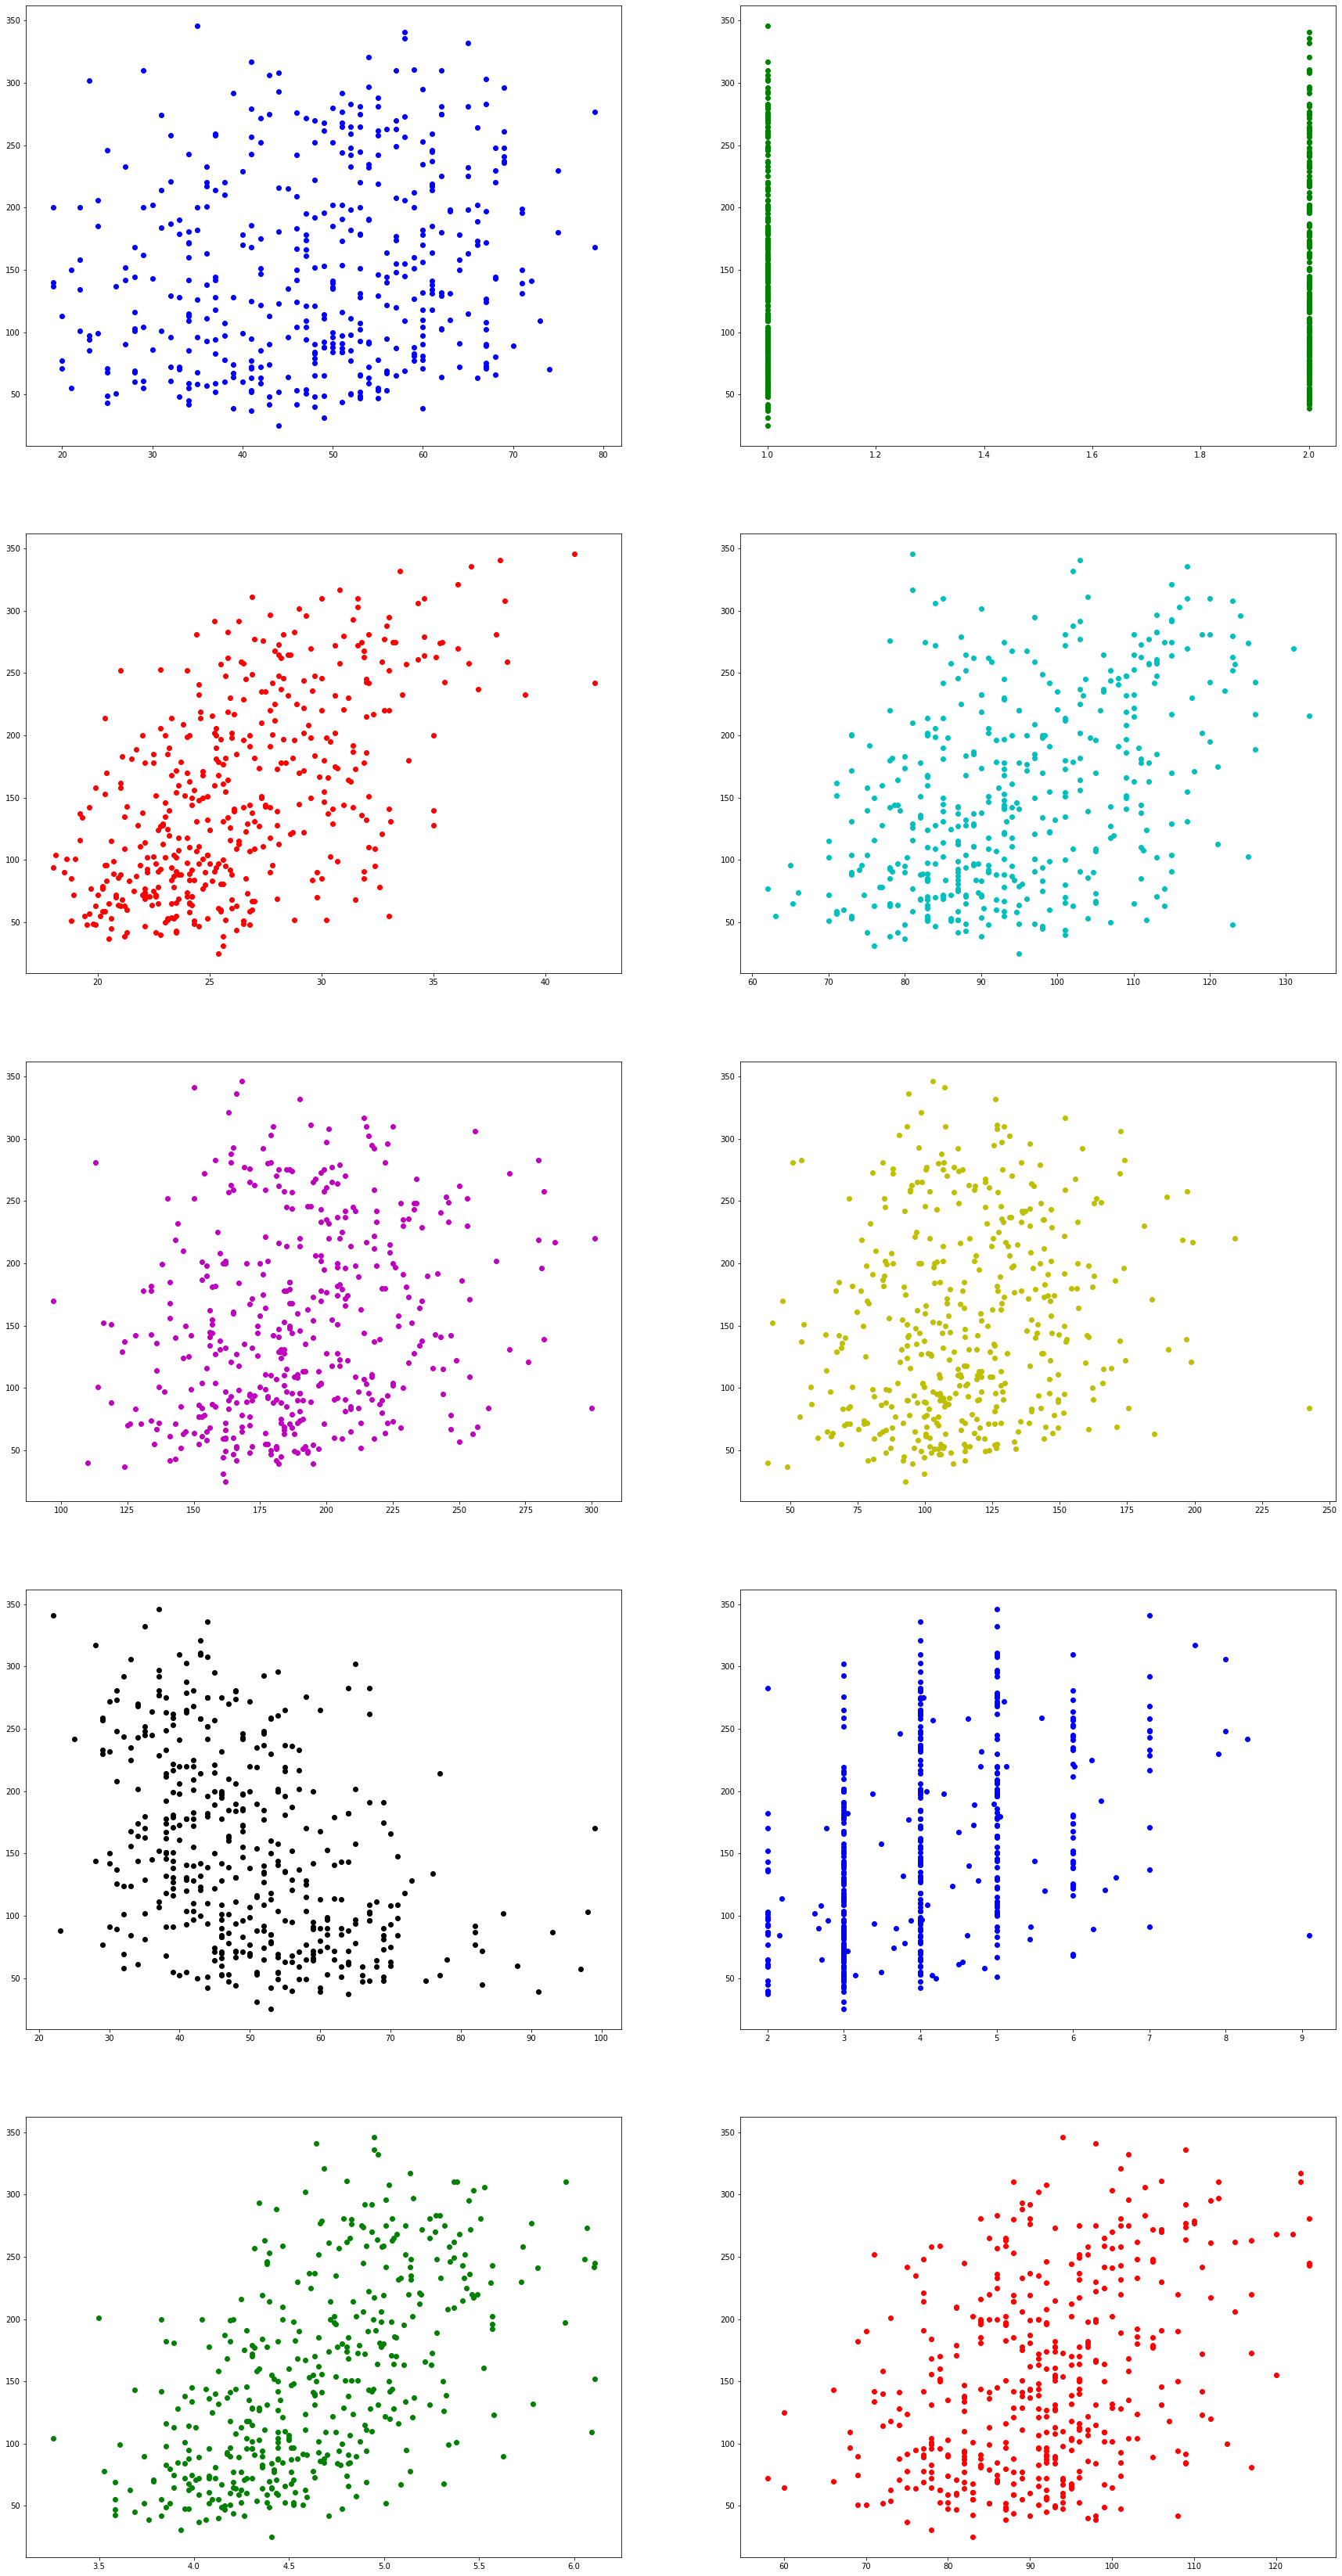

In [51]:
draw_data_plots()

In [156]:
X = np.array(data.iloc[:, :len(datapoint_features)])
ones = np.ones((X.shape[0], 1))
XBar = np.concatenate((ones, x), axis=1)
y = np.array([data['result']]).T
regr = linear_model.LinearRegression()
regr.fit(XBar, y)
regr.coef_

array([[ 0.00000000e+00, -3.63612242e-02, -2.28596481e+01,
         5.60296209e+00,  1.11680799e+00, -1.08999633e+00,
         7.46450456e-01,  3.72004715e-01,  6.53383194e+00,
         6.84831250e+01,  2.80116989e-01]])

In [160]:
XBar

array([[ 1.    , 59.    ,  2.    , ...,  4.    ,  4.8598, 87.    ],
       [ 1.    , 48.    ,  1.    , ...,  3.    ,  3.8918, 69.    ],
       [ 1.    , 72.    ,  2.    , ...,  4.    ,  4.6728, 85.    ],
       ...,
       [ 1.    , 60.    ,  2.    , ...,  3.77  ,  4.1271, 95.    ],
       [ 1.    , 36.    ,  1.    , ...,  4.79  ,  5.1299, 85.    ],
       [ 1.    , 36.    ,  1.    , ...,  3.    ,  4.5951, 92.    ]])